In [40]:
from crypto import GeneratePrimeGeneratorPair
import numpy as np

In [115]:
p , g = GeneratePrimeGeneratorPair(20)
print(p,g)

925499 138051


In [141]:
from random import randrange

def find_y(x,p,g,max_iter=  500000):
    for i in range(max_iter): 
        y= randrange(1,p)
        if pow(g,y,p) ==x:
            return y
    return None

In [142]:
%%time
x = randrange(1,p)
y = find_y(x,p,g)
print(y)
if y is not None : 
    assert x == pow(g,y,p) , "x not found"
else : 
    print("Y is None")

843912
Wall time: 587 ms


In [158]:
from time import time

trials= 20
times = []
for bits in range(4,17,1):
    avg_time = []
    for i in range(trials): 
        p,g = GeneratePrimeGeneratorPair(bits)
        x = randrange(1,p)
        
        start_t = time()
        y = find_y(x,p,g,500000)
        end_t = time()
        
        avg_time.append(end_t-start_t)
    print(f"Number of bits :{bits}, avg_time : {np.mean(np.array(avg_time))} ")
    times.append((bits,np.mean(np.array(avg_time))))
    

Number of bits :4, avg_time : 0.0 
Number of bits :5, avg_time : 5.1903724670410154e-05 
Number of bits :6, avg_time : 9.992122650146485e-05 
Number of bits :7, avg_time : 0.00010029077529907226 
Number of bits :8, avg_time : 0.00030003786087036134 
Number of bits :9, avg_time : 0.0008498072624206543 
Number of bits :10, avg_time : 0.0015500187873840332 
Number of bits :11, avg_time : 0.002400052547454834 
Number of bits :12, avg_time : 0.008001625537872314 
Number of bits :13, avg_time : 0.009999501705169677 
Number of bits :14, avg_time : 0.02614715099334717 
Number of bits :15, avg_time : 0.056451928615570066 
Number of bits :16, avg_time : 0.08920497894287109 


In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

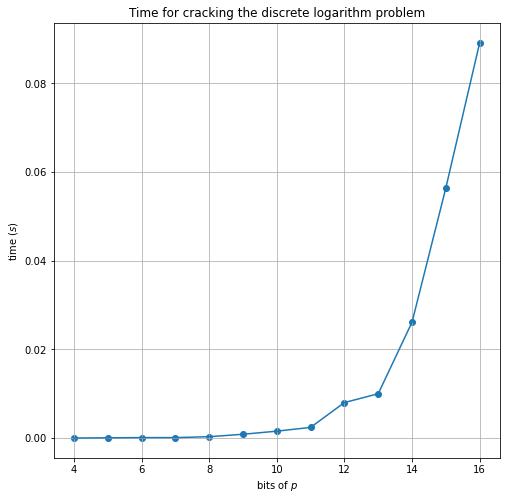

In [159]:
plt.clf()

bits = [x[0] for x in times]
t = [x[1] for x in times]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(bits, t)
ax.plot(bits, t)

ax.set_title("Time for cracking the discrete logarithm problem")
ax.set_xlabel("bits of $p$")
ax.set_ylabel("time ($s$)")

plt.grid()

# implementing  Deffie Hellman 

In [216]:
# The 2 parts of comunication must agree on the same p and g 
bits = 32
p , g = GeneratePrimeGeneratorPair(bits)

print(p,g)


2690282339 466865334


In [217]:
class Party:
    def __init__(self,name,p,g): 
        self.name = name 
        self.p = p
        self.g =g 
        
        self.s = None
        self.a = randrange(p)
        self.A = pow(self.g,self.a,self.p)
        
    def send_A(self):
        return self.A
    def get_B(self,B): 
        self.s = pow(B,self.a,self.p)
    def __str__(self): 
        return f"Party : {self.name}\na : {self.a}\np: {self.p}\ng: {self.g}\nA : {self.A}\nsecret key : {self.s} "

In [218]:
alice = Party("alice",p,g)
bob = Party('bob',p,g)

In [219]:
print(f"{alice}\n\n{bob}")

Party : alice
a : 158968845
p: 2690282339
g: 466865334
A : 1448038256
secret key : None 

Party : bob
a : 554054696
p: 2690282339
g: 466865334
A : 293057024
secret key : None 


In [220]:
A = alice.send_A()
B = bob.send_A()

In [221]:
alice.get_B(B)
bob.get_B(A)

In [222]:
print(f"{alice}\n\n{bob}")

Party : alice
a : 158968845
p: 2690282339
g: 466865334
A : 1448038256
secret key : 1330461347 

Party : bob
a : 554054696
p: 2690282339
g: 466865334
A : 293057024
secret key : 1330461347 
